<a href="https://colab.research.google.com/github/Marco-Barraza/Proyectos-Diplomado/blob/main/AeroML/AeroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivos de la tarea: El objetivo de esta tarea es desarrollar y aplicar un modelo de machine learning para predecir el número de personas que no asisten a abordar los vuelos de la aerolínea AeroML, basándose en distintos parámetros como ruta, día de la semana, hora del día, entre otros.

In [ ]:
#Carga de bibliotecas preliminares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Carga del dataset
data = pd.read_csv("/content/datos_vuelos_AeroML.csv", parse_dates=["fecha", "hora_salida"])

In [ ]:
#exploración basica
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18322 non-null  int64         
 1   fecha                   18322 non-null  datetime64[ns]
 2   numero_vuelo            18322 non-null  int64         
 3   origen                  18322 non-null  object        
 4   destino                 18322 non-null  object        
 5   distancia               18322 non-null  int64         
 6   inasistencia            18322 non-null  int64         
 7   vuelo_denegado          18322 non-null  int64         
 8   tarifa_mediabaja        17315 non-null  float64       
 9   tarifa_alta             18322 non-null  int64         
 10  tarifa_mediaalta        18322 non-null  int64         
 11  tarifa_baja             18322 non-null  int64         
 12  pax_freqflyer           18322 non-null  int64 

In [ ]:
#Numero de filas y colimnas en el dataframe
data.shape

(18322, 22)

In [ ]:
#Cambio de nombre por motivos de interpretación
data.rename(columns={"pax_freqflyer":"millas_N_pasajeros"},inplace=True)

In [ ]:
#Primeras filas
data.head(3)

,id,fecha,numero_vuelo,origen,destino,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,...,millas_N_pasajeros,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,hora_salida,capacidad,venta_usd,agendados
0,69922,2009-02-23,8942,ANF,SCL,1106,7,0,124.0,5,...,20,0,0,0,0,259.0,2024-06-17 21:15:00,168,8399.7,259.0
1,469723,2010-01-13,8941,SCL,ANF,1106,18,0,56.0,0,...,4,0,0,7,6,96.0,2024-06-17 18:15:00,174,8535.7,109.0
2,779308,2010-10-04,9128,ANF,SCL,1106,6,0,1.0,0,...,2,0,0,0,1,78.0,2024-06-17 17:26:00,218,3525.4,79.0


In [ ]:
#Ultimas filas
data.tail(3)

,id,fecha,numero_vuelo,origen,destino,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,...,millas_N_pasajeros,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,hora_salida,capacidad,venta_usd,agendados
18319,627531,2010-06-01,8926,ANF,SCL,1106,9,0,96.0,1,...,9,0,0,1,5,193.0,2024-06-17 00:40:00,174,8202.8,199.0
18320,900155,2011-01-13,9145,SCL,ANF,1106,0,0,0.0,0,...,4,0,0,5,1,73.0,2024-06-17 05:20:00,174,4406.6,79.0
18321,298367,2009-08-27,7938,ANF,SCL,1106,7,0,41.0,10,...,0,0,0,0,2,87.0,2024-06-17 21:00:00,174,17255.8,89.0


In [ ]:
#Extracción y creacion de nuevas variables
data ["año"] = data['fecha'].dt.year
data ["mes"] = data['fecha'].dt.month
data["dia"] = data["fecha"].dt.day
data["dia_semana"] = data["fecha"].dt.day_of_week + 1
data ["hora_salida"] = data["hora_salida"].dt.hour

In [ ]:
#Analisis descriptivo preliminar
data.describe().round()

,id,fecha,numero_vuelo,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,tarifa_mediaalta,tarifa_baja,...,conexion_internacional,sin_conexion,hora_salida,capacidad,venta_usd,agendados,año,mes,dia,dia_semana
count,18322.0,18322,18322.0,18322.0,18322.0,18322.0,17315.0,18322.0,18322.0,18322.0,...,18322.0,18048.0,18317.0,18322.0,18322.0,17681.0,18322.0,18322.0,18322.0,18322.0
mean,612908.0,2010-05-17 01:14:30.428992512,8960.0,1106.0,8.0,0.0,50.0,3.0,4.0,83.0,...,4.0,138.0,14.0,186.0,10768.0,152.0,2010.0,6.0,16.0,4.0
min,158.0,2009-01-02 00:00:00,7926.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,126.0,194.0,3.0,2009.0,1.0,1.0,1.0
25%,277134.0,2009-08-11 00:00:00,8933.0,1106.0,5.0,0.0,2.0,0.0,0.0,57.0,...,1.0,89.0,9.0,174.0,6518.0,102.0,2009.0,3.0,8.0,2.0
50%,575239.0,2010-04-15 00:00:00,9126.0,1106.0,8.0,0.0,36.0,1.0,1.0,87.0,...,2.0,127.0,14.0,174.0,9595.0,144.0,2010.0,6.0,16.0,4.0
75%,932984.0,2011-02-07 00:00:00,9138.0,1106.0,11.0,0.0,97.0,3.0,4.0,111.0,...,5.0,184.0,19.0,218.0,13753.0,201.0,2011.0,9.0,23.0,5.0
max,1350202.0,2012-01-08 00:00:00,9251.0,1106.0,79.0,20.0,185.0,109.0,138.0,276.0,...,89.0,366.0,23.0,274.0,52996.0,384.0,2012.0,12.0,31.0,7.0
std,383862.0,NaN,325.0,0.0,5.0,1.0,49.0,6.0,10.0,41.0,...,6.0,64.0,6.0,21.0,5969.0,64.0,1.0,4.0,9.0,2.0


**Analisis:** Preliminarmente, se puede concluir que los datos no presentan valores inconsistentes. Se destaca que ningún valor mínimo es menor a cero. Si bien los valores máximos tienden a ser más extremos, estos tienen cierta relación con algunas variables. No es raro que, en algunos casos, por ejemplo, los vuelos sean muy sobrevendidos y los ingresos también puedan variar ampliamente entre períodos.

In [ ]:
#Exploración de valores nulos
data.isnull().sum()

id                           0
fecha                        0
numero_vuelo                 0
origen                       0
destino                      0
distancia                    0
inasistencia                 0
vuelo_denegado               0
tarifa_mediabaja          1007
tarifa_alta                  0
tarifa_mediaalta             0
tarifa_baja                  0
millas_N_pasajeros           0
agendado_grupal              0
sin_stock                    0
conexion_nacional            0
conexion_internacional       0
sin_conexion               274
hora_salida                  5
capacidad                    0
venta_usd                    0
agendados                  641
año                          0
mes                          0
dia                          0
dia_semana                   0
dtype: int64

In [ ]:
data["numero_vuelo"].nunique()

125

In [ ]:
data[["origen","inasistencia"]].groupby("origen")["inasistencia"].sum()

origen
ANF    73546
SCL    79024
Name: inasistencia, dtype: int64

In [ ]:
data[["destino","inasistencia"]].groupby("destino")["inasistencia"].sum()

destino
ANF    79024
SCL    73546
Name: inasistencia, dtype: int64

In [ ]:
data["distancia"].value_counts()

distancia
1106    18322
Name: count, dtype: int64

In [ ]:
data.drop(["id","fecha","numero_vuelo","destino","distancia"], axis=1, inplace=True)

**Analisis:** Se determina que las variables ("id", "fecha", "numero_vuelo", "destino" y "distancia") deben ser eliminadas. El id es un correlativo que no aporta más información. Las fechas fueron segregadas para un análisis más homogéneo. El número de vuelo no guarda relación directa con los datos; si bien hay muchos números que logran repetirse (125) de un total en el dataframe de 18.322, estos son un correlativo aleatorio que se resetea y no permite un mayor análisis. La variable destino no aporta mayor análisis ya que el dato estudiado es el ausentismo, y este solo puede contarse en el origen y no en el destino. Por defecto, la distancia también es descartada ya que la variación en las distancias siempre es 0, lo que no aporta valor al modelo.

In [ ]:
#Se crea una función para costruir una variable categorica con las estaciones del año
def estacion (mes, dia):
    if (mes == 12 and dia >= 21) or (mes <= 3 and (mes < 3 or (mes == 3 and dia < 20))):
        return 'Invierno'
    elif (mes == 3 and dia >= 20) or (mes <= 6 and (mes < 6 or (mes == 6 and dia < 21))):
        return 'Primavera'
    elif (mes == 6 and dia >= 21) or (mes <= 9 and (mes < 9 or (mes == 9 and dia < 23))):
        return 'Verano'
    elif (mes == 9 and dia >= 23) or (mes <= 12 and (mes < 12 or (mes == 12 and dia < 21))):
        return 'Otoño'

data['estacion'] = data.apply(lambda row: estacion(row['mes'], row['dia']), axis=1)

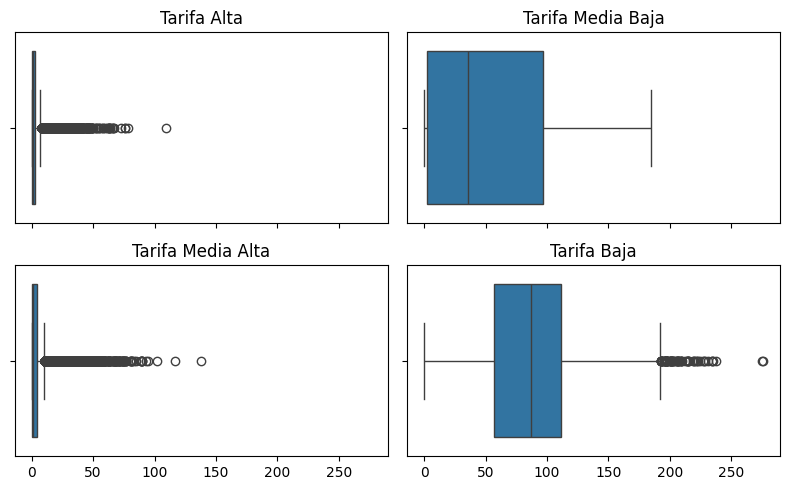

Porcetanje de valores nulos (Tarifa media baja): 5.82%


In [ ]:
#Distribución entre tarifas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5), sharex=True)

sb.boxplot(x='tarifa_alta', data=data, ax=axes[0,0])
axes[0,0].set_title('Tarifa Alta')
axes[0,0].set_xlabel('')

sb.boxplot(x='tarifa_mediaalta', data=data, ax=axes[1,0])
axes[1,0].set_title('Tarifa Media Alta')
axes[1,0].set_xlabel('')

sb.boxplot(x='tarifa_mediabaja', data=data, ax=axes[0,1])
axes[0,1].set_title('Tarifa Media Baja')
axes[0,1].set_xlabel('')

sb.boxplot(x='tarifa_baja', data=data, ax=axes[1,1])
axes[1,1].set_title('Tarifa Baja')
axes[1,1].set_xlabel('')

plt.tight_layout()
plt.show()
print("Porcetanje de valores nulos (Tarifa media baja): " + str(round(data["tarifa_mediabaja"].isnull().sum()/data["tarifa_mediabaja"].count()*100,2))+"%")

In [ ]:
data["tarifa_mediabaja"].fillna(data["tarifa_mediabaja"].median(skipna=True),inplace=True)

**Analisis:** La distribución de las tarifas es muy asimétrica entre las distintas variables, con una fuerte presencia de valores extremos. No se considera eliminar esta variable, ya que los valores nulos representan un 5.82% de los datos, lo cual es un volumen significativo que puede ser útil para análisis futuros. Esta exploración nos permite decidir una técnica para abordar los valores perdidos en la tarifa media baja. Debido a su distribución y forma, estos deben ser imputados por la mediana, ya que esta medida es menos sensible a valores extremos.

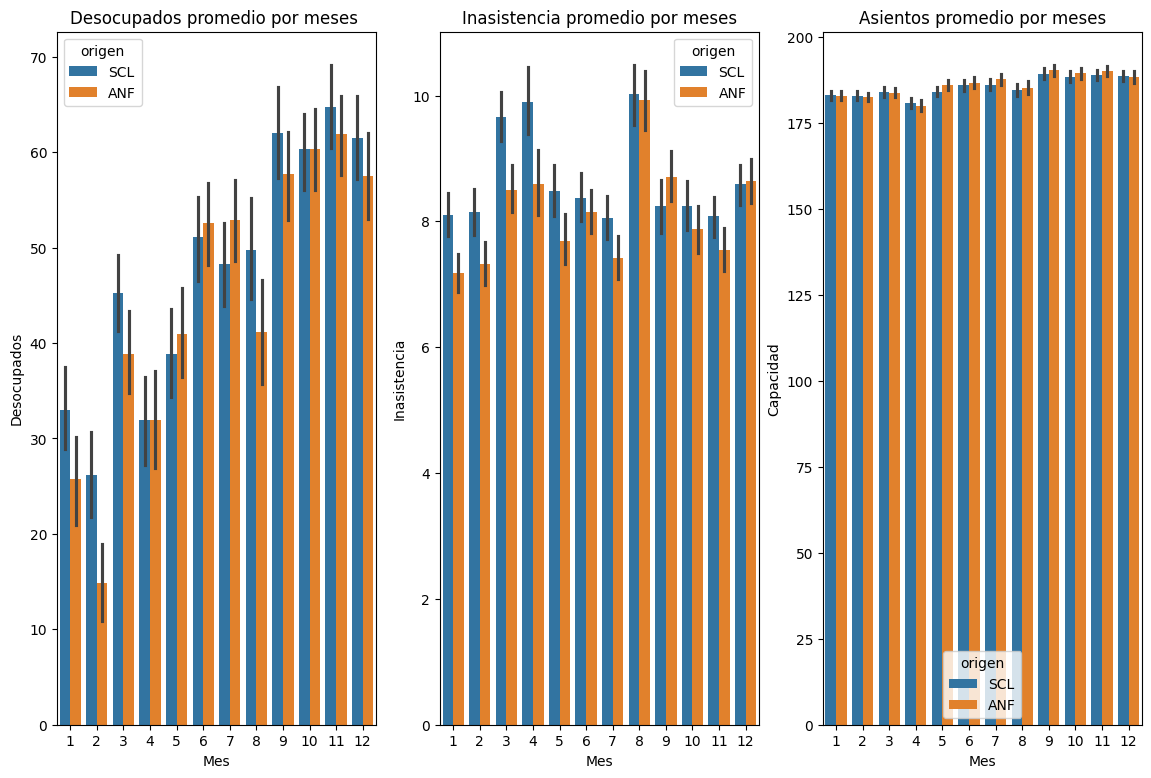

Promedio asientos desocupados por vuelo:  55.0
Promedio parajeros inasistentes por vuelo:  8.0
Promedio asientos por vuelo:  174.0


In [ ]:
#Analisis de ausentes y asientos desocupados
data['total_boletos'] = data[['tarifa_mediabaja', 'tarifa_alta', 'tarifa_mediaalta', 'tarifa_baja']].sum(axis=1)
data["desocupado"] = data["capacidad"]-data["total_boletos"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 9), sharex=True)
sb.barplot(x="mes", y="desocupado", hue="origen", data=data, ax=axes[0])
axes[0].set_title('Desocupados promedio por meses ')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Desocupados')
sb.barplot(x="mes", y="inasistencia", hue="origen", data=data, ax=axes[1])
axes[1].set_title('Inasistencia promedio por meses')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Inasistencia')
sb.barplot(x="mes", y="capacidad", hue="origen", data=data, ax=axes[2])
axes[2].set_title('Asientos promedio por meses')
axes[2].set_xlabel('Mes')
axes[2].set_ylabel('Capacidad')
plt.show()
promedio_desocupados = data["desocupado"].median()
promedio_inasistencias = data["inasistencia"].median()
promedio_capacidad = data["capacidad"].median()
print(f"Promedio asientos desocupados por vuelo: ",promedio_desocupados)
print(f"Promedio parajeros inasistentes por vuelo: ",promedio_inasistencias)
print(f"Promedio asientos por vuelo: ",promedio_capacidad)

**Analisis:** Para analizar los asientos desocupados en los vuelos, se crea una variable que contendrá la suma de todos los asientos vendidos por tarifa. Este total de boletos se usará para restar la capacidad del avión con la finalidad de obtener una variable que indique si la aerolínea ha sobrevendido el vuelo. Aun así, cuando los asientos se visualizan en promedio mensual, la sobreventa, que debería ser un valor negativo, no se logra apreciar y será analizada posteriormente.

De los gráficos podemos destacar que los asientos desocupados promedios por mes tienden a ser menores en los primeros meses del año debido a las vacaciones, cuando la gente tiende a viajar más. Los gráficos se categorizan por origen, pero no se logra ver una descripción que permita concluir preliminarmente algo sobre el aeropuerto y sus ausentes.

Al analizar el promedio general de asientos desocupados, podemos ver que 55 asientos tienden a no ser vendidos. Quizás una estrategia de sobreventa pueda mejorar este indicador, pero como la ruta solo representa dos aeropuertos, un análisis de demanda podría ayudar a entender que tal vez la estrategia de sobreventa deba abordarse solo en algunos meses o estaciones.

In [ ]:
#Creacion variable de sobre venta
data["overbooking"] = data["desocupado"].apply(lambda x: "no" if x >0 else "si")
data["overbooking"].value_counts()

overbooking
no    13624
si     4698
Name: count, dtype: int64

In [ ]:
#Se asigna la mediana en los valores nulos por la asimetria en los agendados
data["agendados"].fillna(data["agendados"].median(skipna=True),inplace=True)
vuelo_1 = data["capacidad"]-data["agendados"]
vuelo = vuelo_1.apply(lambda x: "no" if x >0 else "si")
vuelo.value_counts()

no    12914
si     5408
Name: count, dtype: int64

In [ ]:
vuelo_2 = data["agendados"]-data["total_boletos"]
vuelo = vuelo_2.apply(lambda x: "no" if x >0 else "si")
vuelo.value_counts()

no    17381
si      941
Name: count, dtype: int64

**Analisis:** Cuando analizamos el overbooking por asientos desocupados, variable compuesta por la suma de las tarifas, nos percatamos de que esta genera una sobreventa en 4698 vuelos. Este número es mucho mayor si la sobreventa se calcula con los agendados, siendo 5408 los vuelos con sobreventa. Dado que representa un volumen mayor, se determina continuar con el análisis y la creación definitiva de una variable categórica para el overbooking en funcion de los agendados.

In [ ]:
#Overbooking definitivo
data["desocupado"] = vuelo_1
data["overbooking"] = data["desocupado"].apply(lambda x: "False" if x >0 else "True")

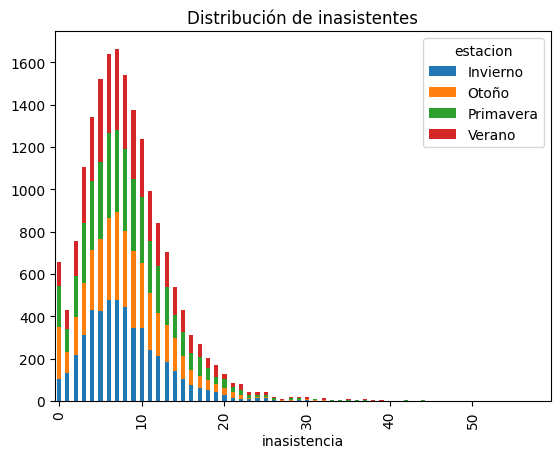

In [ ]:
#Analisis frecuencia de inasistentes por estación
data.groupby(["inasistencia","estacion"]).size().unstack().plot.bar(stacked=True).grid(False)
plt.xscale("linear")
plt.title("Distribución de inasistentes")
plt.show()

**Analisis:** Al visualizar la distribución de los inasistentes por estación, parece haber una asimetría hacia la derecha y una alta frecuencia de ausentes entre 10 y 7 por vuelo. Sabemos que el promedio general es de 8. Podemos concluir de manera temprana que este comportamiento se repite entre las estaciones, ya que no se logra apreciar en este gráfico un fuerte cambio entre los colores por la magnitud de los inasistentes.

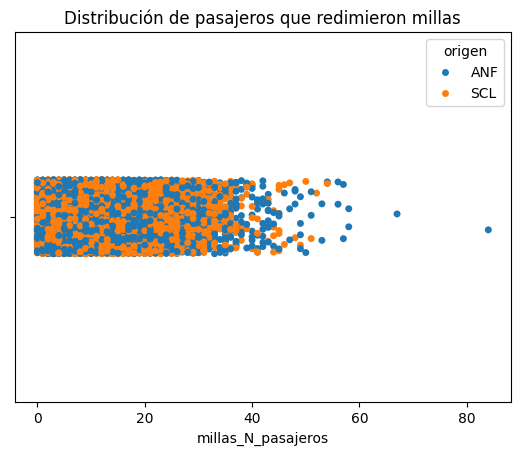

In [ ]:
#Distribución de pasajeros con uso de millas por origen de vuelo
sb.stripplot(x="millas_N_pasajeros",hue="origen",data=data)
plt.title("Distribución de pasajeros que redimieron millas")
plt.show()

In [ ]:
#Creación de categoria volumen de millas para antender el comportamiento de los datos en función del uso de esta promoción
data.loc[data["millas_N_pasajeros"]>60,["millas_N_pasajeros"]]=np.nan
data["millas_N_pasajeros"].fillna(data["millas_N_pasajeros"].median(skipna=True),inplace=True)
data.loc[data["millas_N_pasajeros"]==0,["volumen_millas"]]="cero_uso"
data.loc[(data["millas_N_pasajeros"]>0) & (data["millas_N_pasajeros"]<=20),["volumen_millas"]]="medio_uso"
data.loc[(data["millas_N_pasajeros"]>20) & (data["millas_N_pasajeros"]<=60),["volumen_millas"]]="alto_uso"

**Analisis:** Con el gráfico podemos ver cómo se comporta el número de pasajeros que hacen uso de las millas para viajar desde el origen de su aeropuerto. No se logra apreciar que alguna categoría haga más uso de sus millas. Quizás los asusten tiendan a ser clientes que cancelan sus vuelos porque hacen uso de este beneficio y la pérdida económica para ellos tiende a ser menos significativa. Para profundizar en esta dirección, la variable 'millas' será modificada y los valores que estén sobre las 60 serán reemplazados por la mediana. También crearemos una nueva variable categórica en función del volumen de uso de millas.

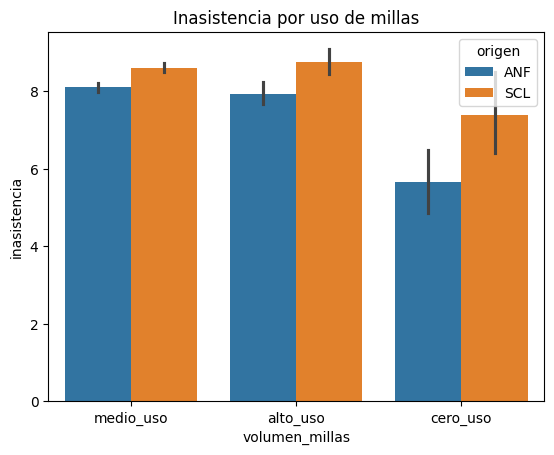

In [ ]:
# Analisis de inasistentes por milla y origen
sb.barplot(y="inasistencia", x="volumen_millas", hue="origen",data=data)
plt.title("Inasistencia por uso de millas")
plt.show()

**Analisis:** De los inasistentes por millas, podemos ver que efectivamente aquellos pasajeros que hacen uso de esta promoción tienden a ser más ausentes. Visto desde el punto de origen, Santiago es el aeropuerto que genera más inasistencias de pasajeros.

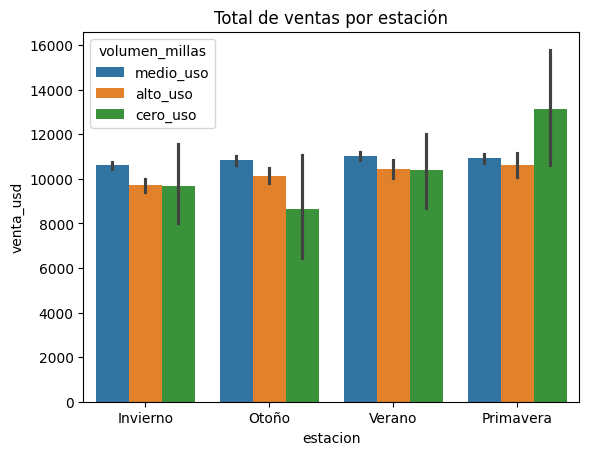

In [ ]:
#Volumen de ventas por estacion y uso de millas
sb.barplot(x="estacion",y="venta_usd", hue="volumen_millas",data=data)
plt.title("Total de ventas por estación")
plt.show()

**Analisis:** De este gráfico podemos entender que el volumen de ventas es muy homogéneo entre las estaciones, excepto en primavera, donde aquellos pasajes que no hacen uso de las millas tienden a ser la mayor parte de las ventas en comparación con las otras categorías de millas y estaciones.

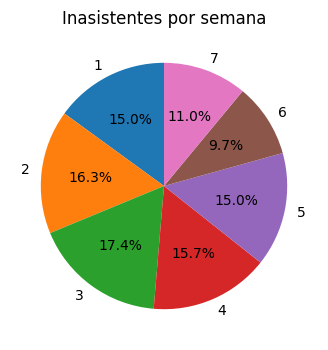

In [ ]:
#Dias de semana e inasistentes
datos_agrupados = data.groupby("dia_semana")["inasistencia"].sum()
plt.figure(figsize=(7, 4))
plt.pie(datos_agrupados, labels=datos_agrupados.index, autopct='%1.1f%%', startangle=90)
plt.title('Inasistentes por semana')
plt.show()

**Analisis:**El gráfico circular permite entender cómo se comportan los inasistentes. Estos comienzan el lunes y alcanzan un peak el miércoles, disminuyen hasta el sábado con un promedio mínimo del 9.7%, para luego volver a subir.

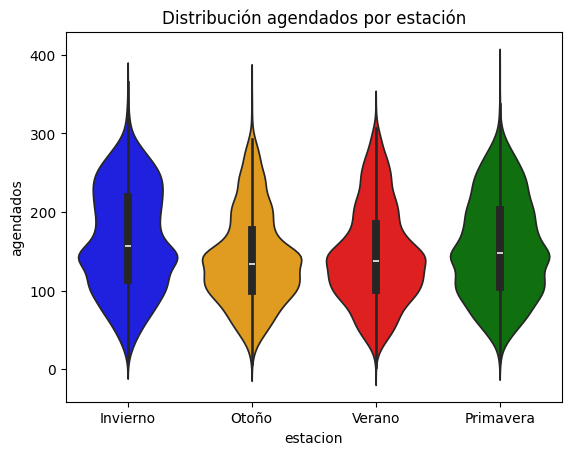

In [ ]:
#Analisis de agendados por estación
palette = {'Invierno': 'blue', 'Primavera': 'green', 'Verano': 'red', 'Otoño': 'orange'}
ax = sb.violinplot(x="estacion", y="agendados", data=data, palette=palette).grid(False)
plt.title("Distribución agendados por estación")
plt.show()

**Analisis:** El gráfico de violín permite ver que las distribuciones entre las estaciones por número de agendados en vuelos son normales. Si bien los violines no son perfectos, al menos los cajones en el 50% de los datos muestran cierta uniformidad para concluir que los agendados pueden tener una forma normal.

In [ ]:
#Creación variable tasa de ocupados
data["tasa_ocupacion"] = data["agendados"]/data["capacidad"]

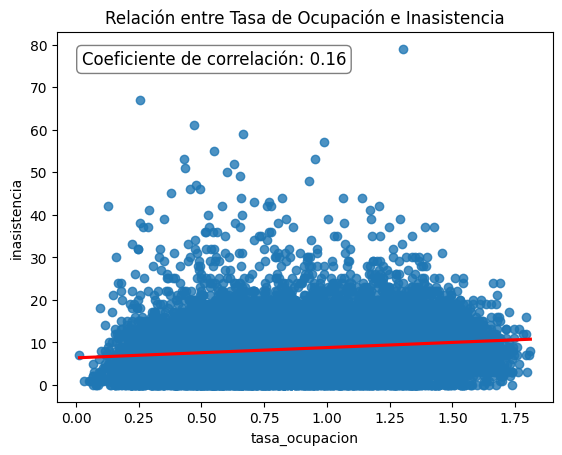

In [ ]:
#Analisis de disperción y relación
from scipy.stats import pearsonr
correlation, _ = pearsonr(data['tasa_ocupacion'], data['inasistencia'])
ax = sb.regplot(x="tasa_ocupacion", y="inasistencia", data=data, line_kws={'color': 'red'})
textstr = f'Coeficiente de correlación: {correlation:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.title("Relación entre Tasa de Ocupación e Inasistencia")
ax.grid(False)
plt.show()

In [ ]:
#Datos por conexión
data["hora_salida"].fillna(data["hora_salida"].median(),inplace=True)
data["sin_conexion"].fillna(data["sin_conexion"].median(),inplace=True)
data[["conexion_internacional","conexion_nacional","sin_conexion"]].head(3)

,conexion_internacional,conexion_nacional,sin_conexion
0,0,0,259.0
1,6,7,96.0
2,1,0,78.0


**Analisis:** No se profundiza en un análisis para las conexiones, ya que la mayoría de los datos están concentrados en vuelos sin conexión, ya que estos son entre Santiago y Antofagasta.

In [ ]:
#Calculo de pesos por tarifa y valor boleto promedio
df = pd.DataFrame()
df['peso_mediabaja'] = data['tarifa_mediabaja'] / data['total_boletos']
df['peso_alta'] = data['tarifa_alta'] / data['total_boletos']
df['peso_mediaalta'] = data['tarifa_mediaalta'] / data['total_boletos']
df['peso_baja'] = data['tarifa_baja'] / data['total_boletos']
df['valor_promedio_boleto'] = (
    (df['peso_mediabaja'] * data['venta_usd']) +
    (df['peso_alta'] * data['venta_usd']) +
    (df['peso_mediaalta'] * data['venta_usd']) +
    (df['peso_baja'] * data['venta_usd'])
) / data['total_boletos']
df.head()

,peso_mediabaja,peso_alta,peso_mediaalta,peso_baja,valor_promedio_boleto
0,0.518828,0.020921,0.004184,0.456067,35.145188
1,0.533333,0.000000,0.009524,0.457143,81.292381
2,0.012987,0.000000,0.000000,0.987013,45.784416
3,0.552036,0.009050,0.018100,0.420814,47.866063
4,0.005376,0.000000,0.000000,0.994624,31.018280


**Anlisis:** Para analizar el valor del boleto, no se recurre a calcularlo mediante una división entre el total de ventas por agendado, ya que, al existir distintas tarifas, el boleto promedio debe ser ponderado para obtener un valor más preciso que represente el total general.

In [ ]:
#Union de datos en un solo dataframe
data = data.join(df)

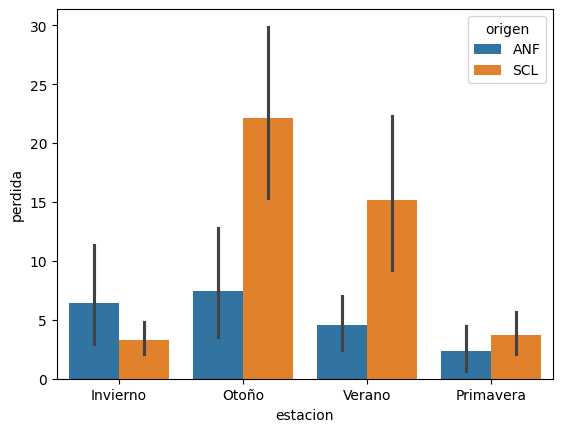

In [ ]:
#Analisis de perdida por origen de vuelo
data["perdida"] = data["valor_promedio_boleto"] * data["vuelo_denegado"]
sb.barplot(x="estacion",y="perdida", hue="origen",data=data)
plt.title("")
plt.show()

**Analisis:** El cálculo del valor del boleto ponderado por el tipo de tarifa nos permite crear una variable para cuantificar las pérdidas por aquellos clientes que, queriendo viajar, no pueden hacerlo porque los vuelos ya están completos, a pesar de que hay asientos vacíos debido a los inasistentes. El gráfico muestra que la mayor pérdida se da en otoño, siendo en su mayoría dominada por el aeropuerto de Santiago.

In [ ]:
#Exploración de nulos
data.isnull().sum()

origen                    0
inasistencia              0
vuelo_denegado            0
tarifa_mediabaja          0
tarifa_alta               0
tarifa_mediaalta          0
tarifa_baja               0
millas_N_pasajeros        0
agendado_grupal           0
sin_stock                 0
conexion_nacional         0
conexion_internacional    0
sin_conexion              0
hora_salida               0
capacidad                 0
venta_usd                 0
agendados                 0
año                       0
mes                       0
dia                       0
dia_semana                0
estacion                  0
total_boletos             0
desocupado                0
overbooking               0
volumen_millas            0
tasa_ocupacion            0
peso_mediabaja            0
peso_alta                 0
peso_mediaalta            0
peso_baja                 0
valor_promedio_boleto     0
perdida                   0
dtype: int64

In [ ]:
#Calculo de asimetria y trasformación logaritmica
del data["desocupado"]
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
left_skewed_columns = []
for col in numeric_columns:
    skewness = data[col].skew()
    if skewness < 0:
        left_skewed_columns.append(col)
print("Variables con asimetría izquierda:")
for col in left_skewed_columns:
    print(f"- {col}")
for col in left_skewed_columns:
    data[col] = np.log1p(data[col])
print("Transformación logarítmica aplicada a las variables con asimetría izquierda.")

Variables con asimetría izquierda:
- tarifa_baja
- hora_salida
- peso_mediabaja
- peso_baja
Transformación logarítmica aplicada a las variables con asimetría izquierda.


**Analisis:** Se calcula la asimetría de todas las variables numéricas del dataframe, y aquellas que presentan asimetría hacia la izquierda se transformarán a sus logaritmos naturales. La variable 'desocupados' será eliminada, ya que contiene valores negativos que no pueden transformarse y ya no se necesitará para los próximos análisis.

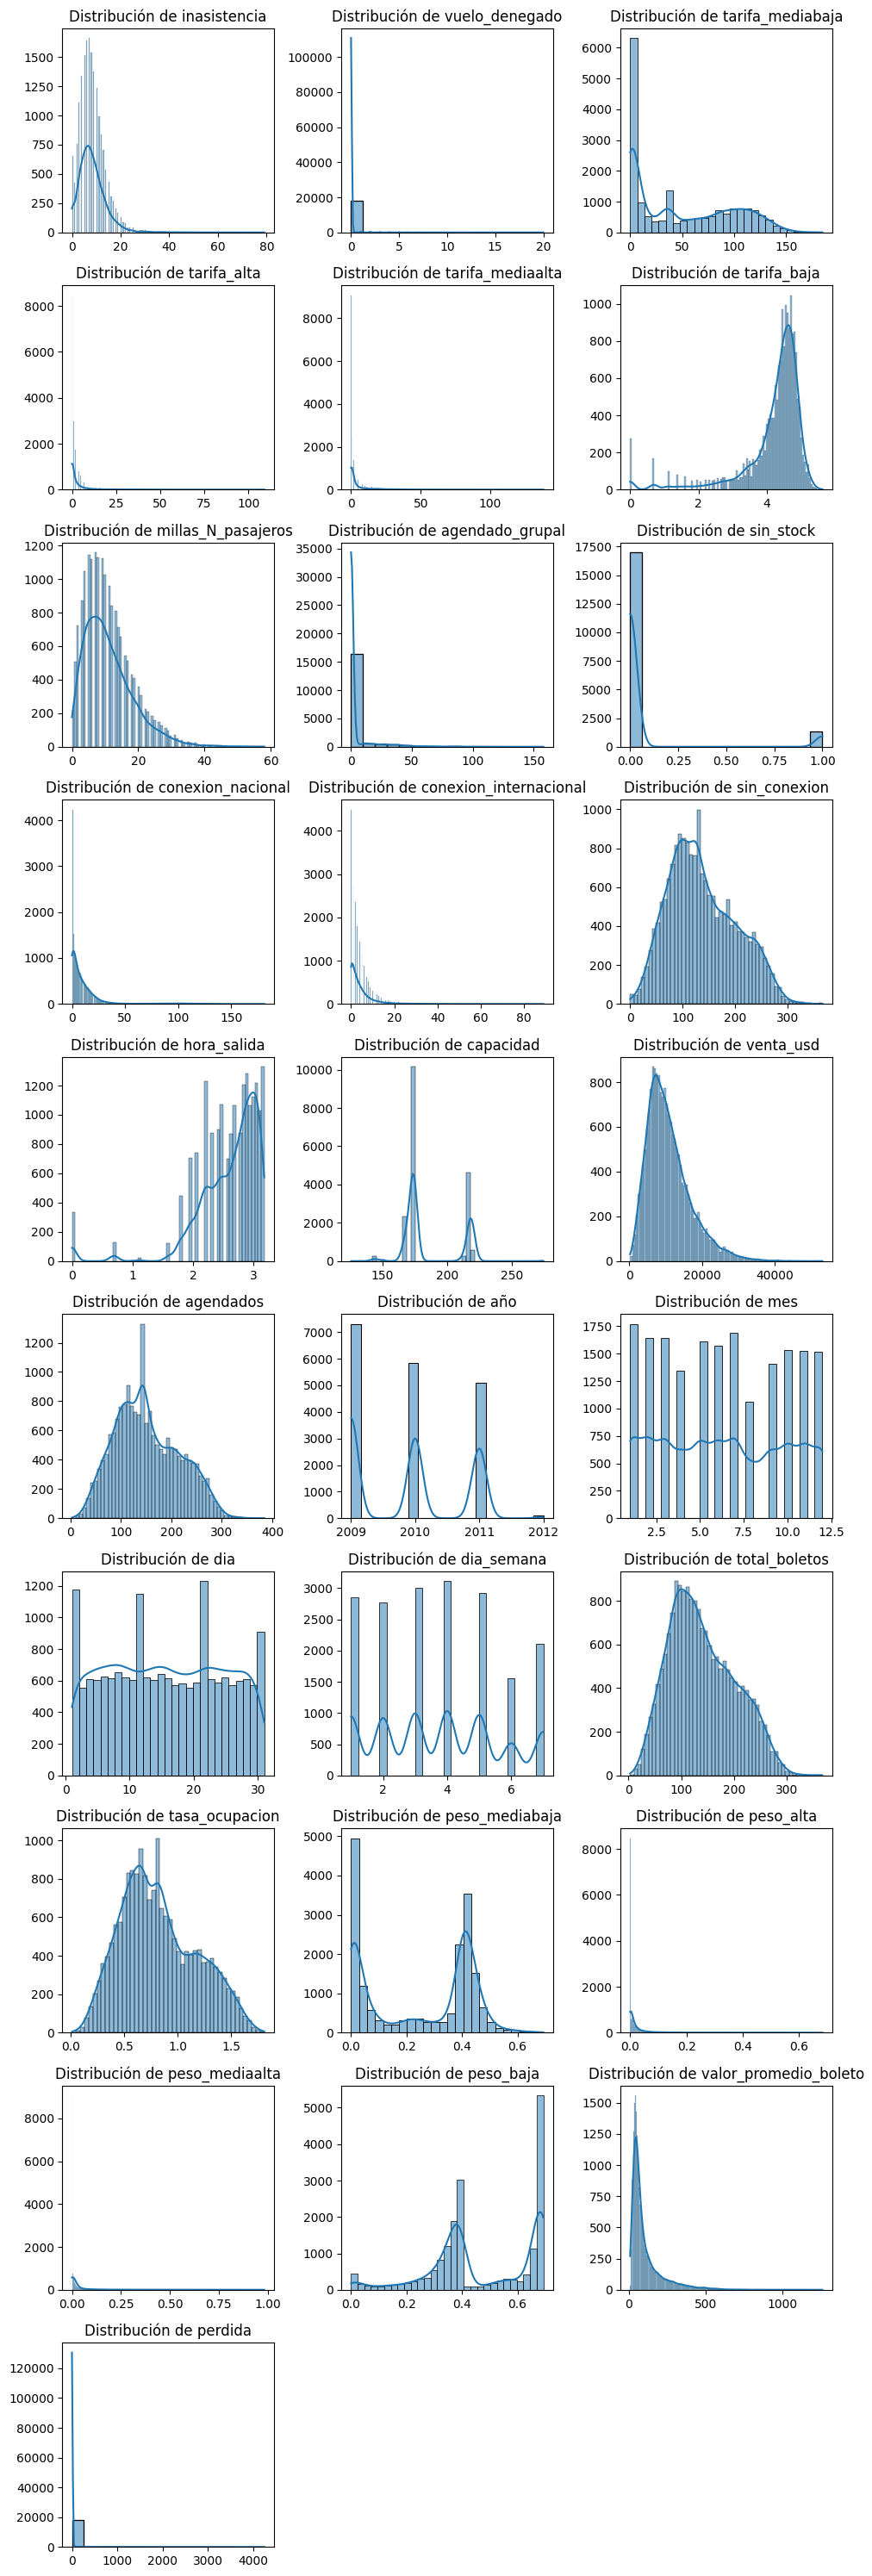

In [ ]:
#visualización distribuciones normalizadas
numeric_columns = data.select_dtypes(include=['float64', 'int64', "int32"]).columns
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10,3*num_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sb.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
#Creación de dammys
object_columns = data.select_dtypes(include=["object"]).columns
print("Columnas de tipo 'object':")
for col in object_columns:
    print(f"- {col}")
data = pd.get_dummies(data, columns=object_columns, drop_first=True)
print("Conversión a variables dummy completada.")

Columnas de tipo 'object':
- origen
- estacion
- overbooking
- volumen_millas
Conversión a variables dummy completada.


**Analisis:** Se itera por el dataframe y se convierten las variables categóricas en variables dummy. Se utiliza la función drop_first=True para eliminar la primera categoría de cada variable, evitando así la colinealidad.

In [ ]:
#Filtro por propiedades estaditicas
data.std()

inasistencia                   5.443675
vuelo_denegado                 0.578305
tarifa_mediabaja              47.866431
tarifa_alta                    5.704688
tarifa_mediaalta               9.669340
tarifa_baja                    0.920350
millas_N_pasajeros             7.526415
agendado_grupal               12.973262
sin_stock                      0.259919
conexion_nacional             18.130702
conexion_internacional         6.044964
sin_conexion                  63.796961
hora_salida                    0.544251
capacidad                     21.487634
venta_usd                   5968.978632
agendados                     63.328584
año                            0.827635
mes                            3.513354
dia                            8.790748
dia_semana                     1.906492
total_boletos                 62.049209
tasa_ocupacion                 0.352675
peso_mediabaja                 0.191953
peso_alta                      0.053383
peso_mediaalta                 0.109549


**Analisis:** Análisis de inutilidad. Aunque hay variables con una distribución estándar ligeramente pequeña, ninguna tiene un valor de cero. Se descarta la eliminación de estas variables hasta realizar un análisis más detallado. Las variables con distribución nula siempre toman el mismo valor por ende deben ser descartadas antes de entrenar algun modelo.

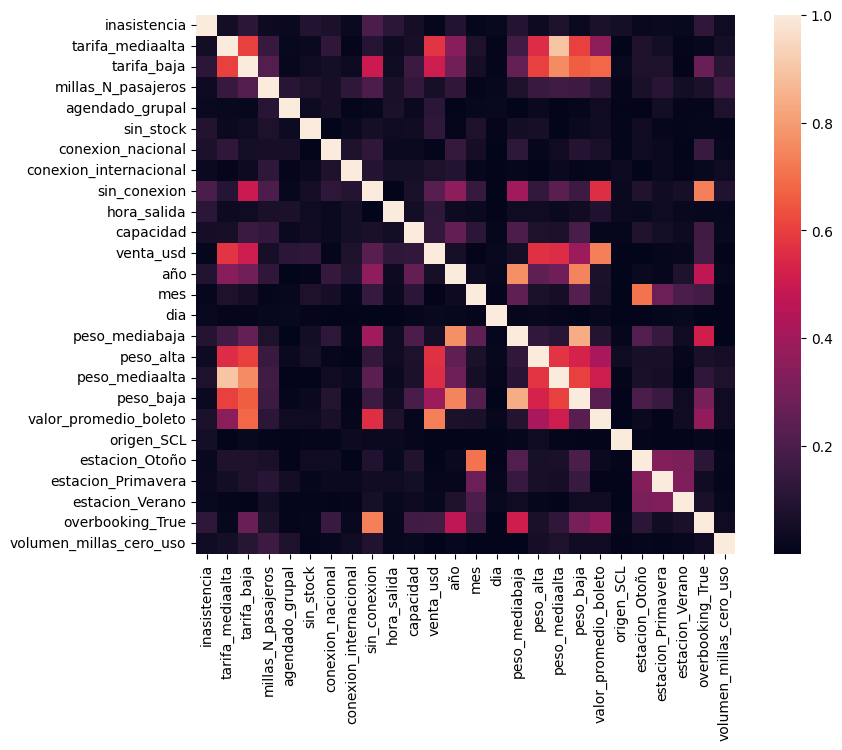

In [ ]:
#Filtro por propiedades estaditicas
corrmat = data.corr().abs()
f, ax = plt.subplots(figsize=(10,7))
sb.heatmap(corrmat, square=True);

**Analisis:** Al analizar el mapa de calor, se pueden observar las correlaciones entre las diferentes variables del conjunto de datos. Durante la construcción del mapa, hemos notado que las correlaciones entre las variables y la variable objetivo (inasistentes) son muy bajas. Esto sugiere que el modelo de regresión puede tener un bajo poder predictivo, ya que no hay una relación fuerte entre las variables independientes y la variable dependiente. Dado que el objetivo del análisis es determinar cuándo aplicar el overbooking para aprovechar la inasistensia, es posible que el modelo deba enfocarse en una variable objetivo binaria nominal en lugar de una continua. Esto se debe a que la variable overbooking muestra mejores correlaciones con los datos de la matriz en comparación con la variable de inasistencias. En este caso, un modelo de clasificación para overbooking podría ser más adecuado, ya que puede manejar de manera más efectiva una variable objetivo categórica y aprovechar las correlaciones más fuertes presentes en los datos. Al cambiar el enfoque hacia un modelo de clasificación con una variable objetivo binaria, se puede mejorar la precisión y la utilidad del modelo en la toma de decisiones relacionadas con el overbooking y modificar el umbral en peridos de mayor demanda con altas tasas de inasistencia para aplicar sobre venta en los vuelos. Esta adaptación permitiria identificar con mayor eficacia las situaciones en las que es apropiado aplicar el overbooking, basándose en patrones más claros y relaciones más fuertes presentes en los datos.

In [ ]:
#Deteción de varibles redundates
corrmat = data.corr()
correlaciones_total_boletos = corrmat.loc["total_boletos"]
correlaciones_alta = correlaciones_total_boletos[correlaciones_total_boletos > 0.80]
print(correlaciones_alta)

tarifa_mediabaja    0.813215
sin_conexion        0.925980
agendados           0.959035
total_boletos       1.000000
tasa_ocupacion      0.922241
Name: total_boletos, dtype: float64


**Analisis:** Al analizar la correlación en el dataframe, se observa que algunas variables tienen una correlación muy fuerte entre sí. Estas variables se consideran redundantes y deben analizarse de forma independiente para una correcta selección de la mejor variable. Para el filtro se estable como redundates aquellas varibles con una correlacion mayor a 80%. Se filtra por total de boletos.  

In [ ]:
#Estrategia de ranking para selección de variable
from scipy.stats import chi2_contingency
#Discretizar variable numerica en 5 bins
punto_corte = data["tarifa_mediabaja"].quantile([0,.2,.4,.6,.8,1])
bins_tarifa_mediabaja = pd.cut(data["tarifa_mediabaja"],bins=punto_corte,include_lowest=True)
punto_corte2 = data["sin_conexion"].quantile([0,.2,.4,.6,.8,1])
bins_sin_conexion =pd.cut(data["sin_conexion"],bins=punto_corte2,include_lowest=True)
punto_corte3 = data["agendados"].quantile([0,.2,.4,.6,.8,1])
bins_agendados =pd.cut(data["agendados"],bins=punto_corte3,include_lowest=True)
punto_corte4 = data["total_boletos"].quantile([0,.2,.4,.6,.8,1])
bins_total_boletos =pd.cut(data["total_boletos"],bins=punto_corte4,include_lowest=True)
punto_corte5 = data["tasa_ocupacion"].quantile([0,.2,.4,.6,.8,1])
bins_tasa_ocupacion =pd.cut(data["tasa_ocupacion"],bins=punto_corte5,include_lowest=True)
#Calcular Chi2
tbl = pd.crosstab(index=bins_tarifa_mediabaja,columns=data["inasistencia"])
stat,p,dof,expected = chi2_contingency(tbl)
print(f"Valor chi2 tarifa_mediabaja: {stat:.2f}")
print(f"P Valor tarifa_mediabaja: {p:.10f}")
tbl2 = pd.crosstab(index=bins_sin_conexion,columns=data["inasistencia"])
stat2,p2,dof2,expected2 = chi2_contingency(tbl2)
print(f"Valor chi2 sin_conexion: {stat2:.2f}")
print(f"P Valor sin_conexion: {p2:.10f}")
tbl3 = pd.crosstab(index=bins_agendados,columns=data["inasistencia"])
stat3,p3,dof3,expected3 = chi2_contingency(tbl3)
print(f"Valor chi2 agendados: {stat3:.2f}")
print(f"P Valor agendados: {p3:.10f}")
tbl4 = pd.crosstab(index=bins_total_boletos,columns=data["inasistencia"])
stat4,p4,dof4,expected4 = chi2_contingency(tbl4)
print(f"Valor chi2 total_boletos: {stat4:.2f}")
print(f"P Valor total_boletos: {p4:.10f}")
tbl5 = pd.crosstab(index=bins_tasa_ocupacion,columns=data["inasistencia"])
stat5,p5,dof5,expected5 = chi2_contingency(tbl5)
print(f"Valor chi2 tasa_ocupacion: {stat5:.2f}")
print(f"P Valor tasa_ocupacion: {p5:.10f}")

Valor chi2 tarifa_mediabaja: 904.41
P Valor tarifa_mediabaja: 0.0000000000
Valor chi2 sin_conexion: 1403.25
P Valor sin_conexion: 0.0000000000
Valor chi2 agendados: 1204.18
P Valor agendados: 0.0000000000
Valor chi2 total_boletos: 1199.17
P Valor total_boletos: 0.0000000000
Valor chi2 tasa_ocupacion: 1100.56
P Valor tasa_ocupacion: 0.0000000000


**Analisis:** Para evaluar la relación entre variables independientes y la variable dependiente, se ha realizado un análisis de Chi-cuadrado. Este análisis permite determinar si existe una asociación significativa entre las variables independientes y la variable dependiente.
Los valores Chi-cuadrado altos y los valores p extremadamente bajos para todas las variables indican que existe una asociación significativa entre estas variables y la variable dependiente. Esto sugiere que las relaciones observadas no son debidas al azar y que estas variables deben ser consideradas importantes en el análisis. No obstante, debido a la fuerte correlación entre estas, se selecciona  la variable sin_conexion por su mayor valor en Chi-cuadrado.

In [ ]:
#Eliminación de variables redundantes
columnas_eliminar = ["tarifa_mediabaja", "agendados", "total_boletos", "tasa_ocupacion"]
data = data.drop(columnas_eliminar, axis=1)

In [ ]:
#Sepación entre variable objetivo y matriz de preditoras
X = data.loc[:,data.columns!="inasistencia"]
y = data.loc[:,data.columns=="inasistencia"]
X.shape

(18322, 30)

In [ ]:
#Selección por irrelevancia
from sklearn.feature_selection import SelectKBest
# Calcular Test F de Fisher
X_Nueva = SelectKBest(k=5).fit(X, y.values.ravel())
# Obtener los nombres de las variables
nombres_variables = X.columns
# Imprimir las variables que no cumplen con el p-valor menor a 0.05
print("Variables con p-value >= 0.05:")
for i, pvalue in enumerate(X_Nueva.pvalues_):
    if pvalue >= 0.05:
        print(f"{nombres_variables[i]}: {pvalue:.10f}")

Variables con p-value >= 0.05:
vuelo_denegado: 0.2397721433
tarifa_alta: 0.1985882181
dia_semana: 0.2707719683
perdida: 0.9215597625
volumen_millas_medio_uso: 0.7244862226


**Analisis:** Se realiza un test f de fisher para evaluar aquellas variables con un valor p mayor al 0.05, dichas variables que estadísticamente se puede concluir que no tienen relación con la el grupo, por ende estas son independientes, cuando el valor de p-value es mayor o igual a 0.05, no hay suficiente evidencia para rechazar la hipótesis nula, lo que sugiere que las diferencias observadas entre los grupos en estas variables podrían haber ocurrido simplemente por azar.

In [ ]:
#Eliminación de varibles sin relación
columnas_eliminar = ["vuelo_denegado", "tarifa_alta", "dia_semana", "perdida","volumen_millas_medio_uso"]
data = data.drop(columnas_eliminar, axis=1)

In [ ]:
#Separación de datos
from sklearn.model_selection import train_test_split
#Particionamiento (80% entrenamiento, 20% testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() # MinMaxScaler = (Se probo este escalamiento)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Analisis:** Se separan los datos para entrenamiento y prueba. Debido a que existen datos con diferentes escalas en las variables, estas se normalizarán mediante trasformación Z. Los datos tambine fueron escalados entre 0 y 1 por el metodo de normalización por diferencias, aprovechando la corrección de inconsistencias y asimetrías realizadas previamente, como la performan en los resultados fue mejor solo en regresión lineal con normalización por Z se declina por esta opción ya que los arboles no sin sencibles a la escala de caracterisicas.

**Selección de modelo:** El modelo de regresión ElasticNet se eligió por su capacidad para manejar la multicolinealidad, seleccionar automáticamente características importantes y ajustar la regularización según sea necesario. Utiliza la combinación de Lasso y Ridge para penalizar los coeficientes de las variables menos importantes y prevenir el sobreajuste. La búsqueda de hiperparámetros con validación cruzada se lleva a cabo para encontrar la combinación óptima de los parámetros de regularización (alpha y l1_ratio) que minimicen el error cuadrático medio negativo, lo que ayuda a obtener un modelo más robusto y generalizable.


Mejores parámetros: {'alpha': 0.025, 'l1_ratio': 0.1}


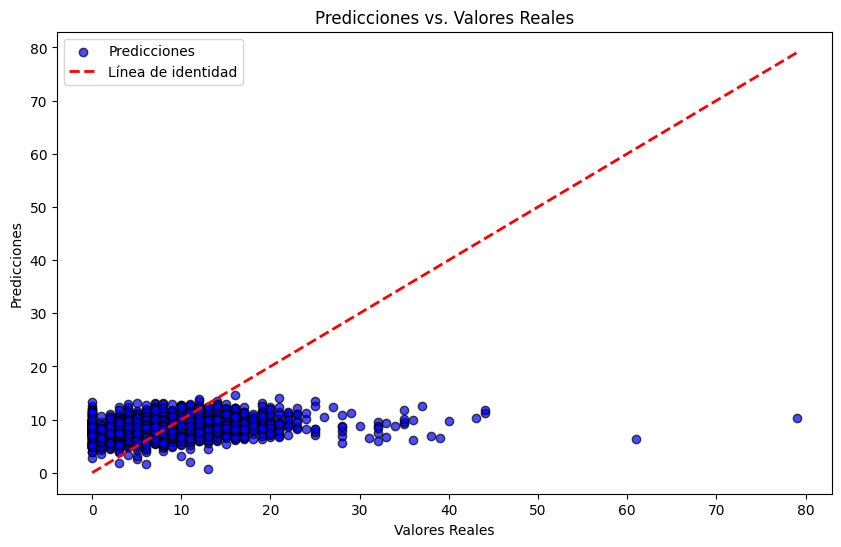

In [ ]:
#Entrenamiento modelo de regresión lineal
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Definir el modelo ElasticNet
elastic_net_model = ElasticNet(random_state=42)
# Definir el grid de parámetros
param_grid = {
    'alpha': [0.025, 0.05, 0.1, 3.0, 10.0],
    'l1_ratio': [0.05, 0.1, 0.2, 0.5, 0.8]}
# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)
# Mejor combinación de parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")
# Mejor modelo
lineal = grid_search.best_estimator_
# Hacer predicciones con el mejor modelo
y_pred_rl = lineal.predict(X_test_scaled)
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rl, color='blue', edgecolor='k', alpha=0.7, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

**Analisis:** Se entrena un modelo de regresión ElasticNet y evalúa su rendimiento mediante validación cruzada. ElasticNet combina L1 (Lasso) y L2 (Ridge) para manejar eficientemente la multicolinealidad y seleccionar las características más importantes.
La búsqueda de hiperparámetros se realiza para encontrar la mejor combinación de alpha y l1_ratio que minimice el error cuadrático medio negativo. Se prueba un rango de valores y se evalúa con validación cruzada para asegurar una evaluación robusta.
Una vez encontrados los mejores hiperparámetros, el modelo se ajusta a los datos de entrenamiento escalados, aprendiendo los patrones y coeficientes óptimos para predecir la variable objetivo. Finalmente, se genera un gráfico de dispersión que muestra las predicciones frente a los valores reales, lo que ayuda a visualizar la calidad del modelo. La línea de identidad indica dónde deberían estar las predicciones perfectas.

**Selección de modelo:** El modelo de árbol de regresión se eligió por su capacidad para capturar relaciones no lineales y complejas entre las variables predictoras y la variable objetivo. Es útil cuando la relación entre las variables no es lineal o hay interacciones no lineales entre ellas. La poda del árbol se realiza para evitar el sobreajuste y encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar. Se buscan los mejores hiperparámetros, como el número máximo de nodos hoja y la profundidad máxima del árbol, utilizando validación cruzada para asegurar un buen rendimiento en datos no vistos.

Mejores parámetros: {'tree__max_depth': 4, 'tree__max_leaf_nodes': 15}


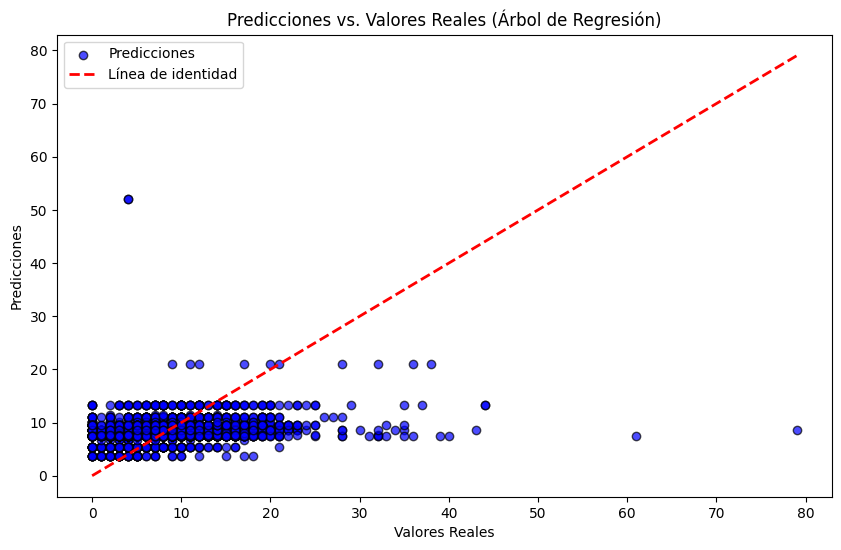

In [ ]:
#Entrenamiento arbol de decisión con poda
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# Definir los parámetros de poda
nodos_hojas_maximos = [5, 10, 15]  # nodos
maxima_profundidad = [3, 4]  # profundidad
parametros = dict(tree__max_leaf_nodes=nodos_hojas_maximos,
                  tree__max_depth=maxima_profundidad)
# Definir el modelo de árbol de regresión
modelo_arbol = Pipeline(steps=[('tree', DecisionTreeRegressor())])
# Configurar la búsqueda con validación cruzada
arbol_vc = GridSearchCV(modelo_arbol, parametros, cv=10)  # validación cruzada
arbol_vc.fit(X_train, y_train)
# Imprimir mejores parámetros
best_params = arbol_vc.best_params_
print(f"Mejores parámetros: {best_params}")
# Ajustar el modelo con los mejores parámetros
arbol = DecisionTreeRegressor(criterion='squared_error',
                                    max_depth=arbol_vc.best_params_['tree__max_depth'],
                                    max_leaf_nodes=arbol_vc.best_params_['tree__max_leaf_nodes'])
arbol.fit(X_train, y_train)
# Hacer predicciones con el mejor modelo
y_pred_arb = arbol.predict(X_test)
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_arb, color='blue', edgecolor='k', alpha=0.7, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Árbol de Regresión)')
plt.legend()
plt.show()

**Analisis:** El modelo se prueba con normalización pero no mejora, se concerva la contruccion sin escalar ya que el modelos no es sensible a la escala de caracteristicas. Para entrenar un arbol de decisión, se deben establecer los parámetros de poda del árbol, como el número máximo de nodos hoja y la máxima profundidad. Estos parámetros se utilizan para buscar la mejor combinación que optimice el rendimiento del modelo. Luego, se configura el modelo de árbol de regresión dentro de un pipeline para encadenar los pasos de forma ordenada, lo que facilita la encapsulación y el procesamiento de los datos. Se realiza una búsqueda de hiperparámetros utilizando GridSearchCV, una técnica de validación cruzada que busca la mejor combinación de parámetros para maximizar la precisión del modelo. Una vez encontrados los mejores parámetros, se ajusta un nuevo modelo de árbol de regresión con esos parámetros optimizados. Después de ajustar el modelo, se hacen predicciones utilizando los datos de prueba y se generan las predicciones versus los valores reales en un gráfico de dispersión. El gráfico muestra cómo se comparan las predicciones del modelo con los valores reales. La línea de identidad en rojo indica dónde deberían estar las predicciones si fueran perfectas, lo que permite visualizar fácilmente el rendimiento del modelo.

**Selección de modelo:** El modelo de bosque aleatorio se elige debido a su capacidad para manejar relaciones no lineales y complejas entre variables, reducir el sobreajuste y proporcionar predicciones precisas. Al utilizar múltiples árboles de decisión entrenados en diferentes subconjuntos de datos y características, este modelo puede mejorar la generalización y el rendimiento predictivo. La técnica de búsqueda de hiperparámetros mediante validación cruzada garantiza una configuración óptima del modelo, ajustando la profundidad máxima del árbol y el número máximo de variables consideradas en cada división.

Los mejores parámetros para Random Forest:
{'rf__max_depth': 6, 'rf__max_features': 6}


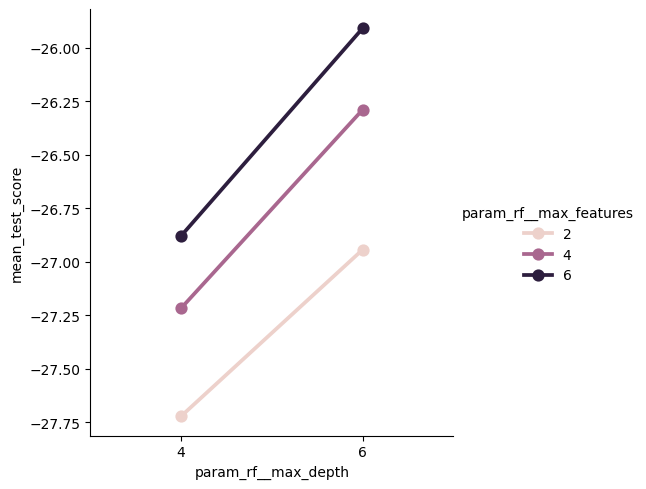

In [ ]:
#Entrenamiento modelo de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor
# Definir el modelo RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Determinación de parámetros para la grilla
max_features = [2, 4, 6]  # Variables a considerar para mejor división
max_depth = [4, 6]  # Máxima profundidad del árbol
parametros = {
    'rf__max_features': max_features,
    'rf__max_depth': max_depth}
# Realizar la grilla
model_rf = Pipeline(steps=[("rf", rf)])
rf_cv = GridSearchCV(model_rf, parametros, cv=10, scoring='neg_mean_squared_error')  # Validación cruzada
rf_cv.fit(X_train_scaled, y_train)
# Mejores parámetros según la grilla
print("Los mejores parámetros para Random Forest:")
print(rf_cv.best_params_)
# Guardar el mejor modelo
mejor_rf = rf_cv.best_estimator_
# Hacer predicciones con el mejor modelo
y_pred_rf = mejor_rf.predict(X_test_scaled)
# Graficar el desempeño obtenido para cada combinación de parámetros
grid_results = pd.DataFrame(rf_cv.cv_results_)
sb.catplot(x="param_rf__max_depth", y="mean_test_score", hue="param_rf__max_features",
           kind="point", data=grid_results)
plt.show()

**Analisis:** El modelo de bosque aleatorio utiliza validación cruzada para encontrar los mejores hiperparámetros. En primer lugar, se define el modelo de bosque aleatorio con ciertos parámetros como el número de árboles y la semilla aleatoria. Luego, se determinan los parámetros para la búsqueda en la grilla, especificando los valores a probar para el número máximo de variables a considerar en cada división y la máxima profundidad de los árboles. Estos parámetros se buscan utilizando GridSearchCV, que evalúa el modelo con diferentes combinaciones de hiperparámetros para encontrar la óptima. Una vez encontrados los mejores parámetros, se ajusta el modelo de bosque aleatorio con esos valores optimizados. Se hacen predicciones con el modelo ajustado utilizando datos de prueba. Además, se visualiza el desempeño del modelo para cada combinación de parámetros en un gráfico, mostrando cómo varía la puntuación de validación cruzada con respecto a la profundidad máxima y el número máximo de características consideradas en cada división del árbol.

In [ ]:
#tabla evalución
result_table = pd.DataFrame(columns=['classifiers', 'RMSE','R2','MAE'])

# Evaluar el mejor modelo de regresión lineal
linear_mse = mean_squared_error(y_test, y_pred_rl)
linear_r2 = r2_score(y_test, y_pred_rl)
linear_mae = mean_absolute_error(y_test, y_pred_rl)
# Crear un nuevo DataFrame con los resultados
new_row = pd.DataFrame({'classifiers': ['Regresión lineal'], 'RMSE': [linear_mse], 'R2': [linear_r2], 'MAE': [linear_mae]})
# Concatenar el nuevo DataFrame con la tabla de resultados
result_table = pd.concat([result_table, new_row], ignore_index=True)

# Evaluar el mejor modelo arbol de decisión con poda
tree_mse = mean_squared_error(y_test, y_pred_arb)
tree_r2 = r2_score(y_test, y_pred_arb)
tree_mae = mean_absolute_error(y_test, y_pred_arb)
# Crear un nuevo DataFrame con los resultados
new_row = pd.DataFrame({'classifiers': ['Arbol de decisión'], 'RMSE': [tree_mse], 'R2': [tree_r2], 'MAE': [tree_mae]})
# Concatenar el nuevo DataFrame con la tabla de resultados
result_table = pd.concat([result_table, new_row], ignore_index=True)

# Evaluar el mejor modelo de bosque aleatorio
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
# Crear un nuevo DataFrame con los resultados
new_row = pd.DataFrame({'classifiers': ['Bosque aleatorio'], 'RMSE': [rf_mse], 'R2': [rf_r2], 'MAE': [rf_mae]})
# Concatenar el nuevo DataFrame con la tabla de resultados
result_table = pd.concat([result_table, new_row], ignore_index=True)
result_table

,classifiers,RMSE,R2,MAE
0,Regresión lineal,26.833346,0.089129,3.704449
1,Arbol de decisión,28.136509,0.044893,3.767025
2,Bosque aleatorio,25.826153,0.123319,3.644483


**Resultados:** El primer modelo es la Regresión Lineal, que tiene un RMSE (Root Mean Squared Error) de aproximadamente 26.83, lo que indica la raíz cuadrada del error cuadrático medio entre las predicciones del modelo y los valores reales. El coeficiente de determinación R2 es de alrededor de 0.089, lo que significa que el modelo explica aproximadamente el 9% de la variabilidad en los datos de forma lineal. El MAE (Mean Absolute Error) es de aproximadamente 3.70, lo que indica el promedio de las diferencias absolutas entre las predicciones y los valores reales.

El segundo modelo es el Árbol de Decisión, con un RMSE de alrededor de 28.14, un R2 de aproximadamente 0.04 y un MAE de aproximadamente 3.77. Estos valores sugieren que el modelo de árbol de decisión tiene un rendimiento similar al de la regresión lineal, pero ligeramente inferior.

Finalmente, el tercer modelo es el Bosque Aleatorio, con un RMSE de alrededor de 25.83, un R2 de aproximadamente 0.12 y un MAE de aproximadamente 3.64. Estos resultados indican que el modelo de bosque aleatorio tiene un mejor rendimiento en comparación con los otros dos modelos, ya que tiene un RMSE más bajo, un R2 más alto y un MAE más bajo, lo que sugiere que es capaz de hacer predicciones más precisas y explicar mejor la variabilidad en los datos. Aun asi, se recomienda replanetar el problema, quizas la varible a explicar con los modelos deveria estar dirigica a cuando aplicar sobre venta y aprovechar las inasistensias mas que solo intentar predecir las inasistencia con datos no que tiene mucha relacion con el obejtivo. Se concluye que los datos deben ser utilizados para un objetivo diferente, como optimizar la sobreventa de vuelos. Por lo tanto, los modelos de predicción seleccionados deben centrarse en métodos de clasificación, ya que son más adecuados para este tipo de tarea.

**Cambio de objetivo:** En lugar de los objetivos actuales, se propone que los datos se enfoquen en determinar el mejor momento para sobre vender vuelos, una práctica común en la industria de la aviación para maximizar la ocupación.

**Selección de modelos:** Dado este nuevo objetivo, se recomienda usar modelos de clasificación, que son más efectivos para predecir eventos binarios, como la probabilidad de no presentarse a un vuelo.

**Discuta la importancia de la evaluación y selección de modelos:** La evaluación y selección de modelos en aprendizaje automático son pasos fundamentales para garantizar la precisión y utilidad de nuestras predicciones. Evaluar un modelo nos ayuda a comprender cómo generaliza en datos no vistos y evita problemas como sobreajuste y subajuste. La selección del modelo correcto optimiza el rendimiento del sistema, asegurando que nuestras predicciones sean fiables y eficientes. Además, elegir el modelo adecuado facilita la interpretación de los resultados y su capacidad para manejar grandes volúmenes de datos.


**Reflexione sobre las decisiones tomadas durante el desarrollo del modelo:** Durante el desarrollo del modelo, es crucial tomar decisiones que impacten positivamente en su rendimiento y capacidad de generalización. Esto implica seleccionar métricas adecuadas para evitar el sobreajuste y garantizar la precisión en datos nuevos. También es importante elegir el algoritmo más apropiado, manejar características relevantes, tratar valores atípicos y normalizar los datos para mejorar la calidad del modelo.
Además, la selección óptima de hiperparámetros mediante técnicas como la validación cruzada y la búsqueda de cuadrícula es esencial para mejorar el rendimiento del modelo. Al evaluar y comparar diferentes modelos, podemos determinar cuál se ajusta mejor a nuestros datos y necesidades específicas.


**Comente las dificultades encontradas y cómo las abordó:** Durante el proyecto, se enfrentaron desafíos como la selección de variables relevantes y la limpieza de datos. Para superarlos, se aplicaron análisis exploratorios y técnicas de selección de características, además de la imputación de valores faltantes y la eliminación de valores atípicos. La optimización de hiperparámetros también fue crucial. Se utilizaron métodos como y la validación cruzada para encontrar la mejor configuración del modelo, evitando el sobreajuste mediante técnicas de regularización, estas dificultades se abordaron con un enfoque sistemático y metodológico, que incluyó la exploración exhaustiva de técnicas y la comprensión detallada de los datos y modelos, asegurando así la calidad y generalización del modelo final.